## Quantitative Analysis

i.e. here, I perform a quantitative analysis of the training output datasets: are the trained models able to work better (or worse) under certain circumstances?
That is:
- with a certain type of quantifier? (all, exists) (is a certain type of quantifier harder?)
- with a certain number of keys? (generally -> or specifically: with a certain number of predicates? / constants?) (is more keys / predicates / constants harder?)
- with a certain number of constants?
- with a certain number of predicates?
- with a certain size of the world model? (is a bigger world model harder?)
- with a certain number of operators? (is more operators harder?)
- with a certain type of operator? (negation, implication, and-operator) -> especially: is there negation in front of quantifiers or not? // using only no operators vs. unary vs. binary operators // (is a certain type of operator harder (none, unary, binary)? is negation in front of quantifiers harder?)
- etc. (e.g. do the models tend to produce tautologies / contradictions?)

(dazu sowohl Output Datensatz als auch Input Datensatz laden, über id Mappen!!)
=> dann noch: weitere Spalten miteinbeziehen: correctIncorrect vs. Gibberish.

- for evaluation, we chose the datapoints: 80000:81000
- manche der unten stehenden Evals machen gegeben der Task keinen Sinn!! 
    - Task 1: Input:  World Model + Keys + Satisfied => also: macht nur world model count, constants count, keys count, predicates count Sinn. Aber nicht: quantifier, operator count, operator type.
    - Task 2: Input: Formula + Satisfied => also: umgekehrt wie task 1: es macht nur: operator count, operator type, quantifier Sinn, (predicates count). Aber nicht: world model count, constants count, keys count.
    - Task 3: Input: Formula + Keys + World Model => also: macht alles Sinn.


In [1]:
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'Llama-2-13b-chat-hf_trained_on_t1_task1_hard.json' #TODO: change 
output_dataset = pd.read_json('../results/training-hard-eval/' + filename)
filename = 'base_pred_logic_data_hard.json'
base_dataset = pd.read_json('../datasets/' + filename)

In [3]:
output_dataset

,Predictions,Target-sat,Valuation,Correct,Gibberish
0,all x.-(-F(x) & -G(x))\n\nAnswer:all x.-(F(x) ...,unsatisfied,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",True,False
1,all x.-(-F(x) -> F(x))\n\nAnswer:all x.-(-F(x)...,unsatisfied,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",True,False
2,all x.-(-F(x) & G(x))\n\nAnswer:all x.-(F(x) &...,unsatisfied,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",True,False
3,all x.-(-H(x) & F(x)) is unsatisfied given the...,unsatisfied,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",False,False
4,exists x.-(-H(x) & -F(x))\n\nAnswer:exists x.-...,satisfied,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",True,False
...,...,...,...,...,...
995,all x.-(-H(x) & F(x)) is unsatisfied given the...,unsatisfied,"[[o, Ailani], [q, Nova], [r, Peter], [l, Trevo...",True,False
996,all x.-(-H(x) -> -F(x))\n\nAnswer:all x.-(G(x)...,unsatisfied,"[[q, Damon], [a, Imani], [i, Jaime], [d, Colin...",True,False
997,exists x.-(F(x) & -H(x)).\n\nAnswer:all x.(-F(...,satisfied,"[[q, Enrique], [s, Aviana], [H, [q]], [H, [s]]...",True,False
998,exists x.-(F(x) & -H(x)).\n\nAnswer:all x.-(F(...,satisfied,"[[g, Max], [i, Maximilian], [d, Katalina], [o,...",True,False


In [4]:
# subset:
base_dataset = base_dataset.iloc[0:1000]
len(base_dataset)

1000

In [5]:
base_dataset

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
0,exists y.all x.(-G(x) & -(-F(y) -> -F(y))),"[F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'F': 'Confident', 'G': 'Bothered'}","{'d': 'Catalina', 'g': 'Ulises', 'n': 'Meredit...",F: Confident. G: Bothered. d: Catalina. g: Uli...,"[Catalina, Ulises, Meredith, Diana, Philip, Ka...","[Confident, Bothered]",Catalina is not Confident. Ulises is not Conf...,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",unsatisfied
1,-all y.exists x.(-F(y) -> -(F(y) & -F(x))),[F],"[y, x]","[>, &, -]","['all', 'exists']",{'F': 'Conservative'},"{'k': 'Lennox', 'b': 'Evie', 'h': 'Leyla', 'i'...",F: Conservative. k: Lennox. b: Evie. h: Leyla....,"[Lennox, Evie, Leyla, Trent, Andrew, Abdiel, J...",[Conservative],Lennox is not Conservative. Evie is Conservat...,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",unsatisfied
2,all y.exists x.(F(x) & (-F(y) -> G(y))),"[F, G]","[y, x]","[>, &, -]","['all', 'exists']","{'F': 'Bothered', 'G': 'Selfish'}","{'h': 'Paris', 's': 'Franklin', 'k': 'Gia', 'd...",F: Bothered. G: Selfish. h: Paris. s: Franklin...,"[Paris, Franklin, Gia, Saige, Jaziel, Rocky, E...","[Bothered, Selfish]",Paris is Bothered. Franklin is Bothered. Gia ...,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",unsatisfied
3,-all y.exists x.(-G(x) & -(H(x) & F(y))),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Conscientious', 'F': 'Arrogant', 'G': '...","{'b': 'Dulce', 'p': 'Arabella', 'd': 'Bruno', ...",H: Conscientious. F: Arrogant. G: Distraught. ...,"[Dulce, Arabella, Bruno, Nathanael, Giana, Adl...","[Conscientious, Arrogant, Distraught]",Dulce is Conscientious. Arabella is Conscient...,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",unsatisfied
4,-exists y.all x.(-(H(x) -> -F(y)) & -G(x)),"[H, F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'H': 'Antagonistic', 'F': 'Joyful', 'G': 'Zea...","{'a': 'Tadeo', 'o': 'Braden', 'j': 'Jacqueline...",H: Antagonistic. F: Joyful. G: Zealous. a: Tad...,"[Tadeo, Braden, Jacqueline, Audrey, Emma]","[Antagonistic, Joyful, Zealous]",Tadeo is Antagonistic. Braden is Antagonistic...,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,exists y.all x.-(H(y) -> -(-G(x) -> F(y))),"[H, F, G]","[y, x]","[->, -]","['all', 'exists']","{'H': 'Panicky', 'F': 'Quarrelsome', 'G': 'Sco...","{'o': 'Ailani', 'q': 'Nova', 'r': 'Peter', 'l'...",H: Panicky. F: Quarrelsome. G: Scornful. o: Ai...,"[Ailani, Nova, Peter, Trevor, Alexandra, Adley...","[Panicky, Quarrelsome, Scornful]",Ailani is not Panicky. Nova is not Panicky. P...,"[[o, Ailani], [q, Nova], [r, Peter], [l, Trevo...",unsatisfied
996,-exists y.all x.-(-(F(x) & -G(y)) & -H(y)),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Accepting', 'F': 'Joyful', 'G': 'Consci...","{'q': 'Damon', 'a': 'Imani', 'i': 'Jaime', 'd'...",H: Accepting. F: Joyful. G: Conscientious. q: ...,"[Damon, Imani, Jaime, Colin, Amaya]","[Accepting, Joyful, Conscientious]",Damon is Accepting. Imani is not Accepting. J...,"[[q, Damon], [a, Imani], [i, Jaime], [d, Colin...",unsatisfied
997,all y.exists x.(-F(y) -> (F(x) -> H(x))),"[H, F]","[y, x]","[>, -]","['all', 'exists']","{'H': 'Bitter', 'F': 'Passionate'}","{'q': 'Enrique', 's': 'Aviana'}",H: Bitter. F: Passionate. q: Enrique. s: Aviana.,"[Enrique, Aviana]","[Bitter, Passionate]",Enrique is Bitter. Aviana is Bitter. Enrique ...,"[[q, Enrique], [s, Aviana], [H, [q]], [H, [s]]...",satisfied
998,exists y.all x.(G(y) -> -(F(x) -> H(y))),"[H, F, G]","[y, x]","[>, ->, -]","['all', 'exists']","{'H': 'Scornful', 'F': 'Confident', 'G': 'Dist...","{'g': 'Max', 'i': 'Maximilian', 'd': 'Katalina...",H: Scornful. F: Confident. G: Distracted. g: M...,"[Max, Maximilian, Katalina, Cayden, Vincenzo, ...","[Scornful, Confident, Distracted]",Max is Scornful. Maximilian is not Scornful. ...,"[[g, Max], [i, Maximilian], [d, Katalina

#### Descriptive Statistics

In [6]:
satCounts = base_dataset['Satisfied'].value_counts()
satCounts

Satisfied
unsatisfied    504
satisfied      496
Name: count, dtype: int64

In [7]:
# First: show descriptive statistics of evaluation dataset:
# number of quantifiers: all, exists
quantifiersCounts = base_dataset['Quantifiers'].value_counts()
quantifiersCounts


Quantifiers
['all', 'exists']    1000
Name: count, dtype: int64

In [8]:
# distribution of predicates
predicatesCounts = base_dataset['Predicates'].value_counts() # then add the singular F and G to one line
predicatesCounts

Predicates
[F, G]       231
[H, G]       231
[H, F, G]    220
[H, F]       210
[G]           43
[F]           36
[H]           29
Name: count, dtype: int64

In [9]:
# distribution of constants 
oldConstants = base_dataset['Names']
constants = []
for con in oldConstants:
    constants.append(len(con))
constantsCounts = collections.Counter(constants) # the keys() is what is counted, and the values() is the count
constantsCounts

Counter({10: 135,
         7: 109,
         9: 116,
         5: 97,
         1: 30,
         8: 126,
         3: 89,
         6: 123,
         2: 75,
         4: 100})

<Axes: xlabel='Number_of_constants'>

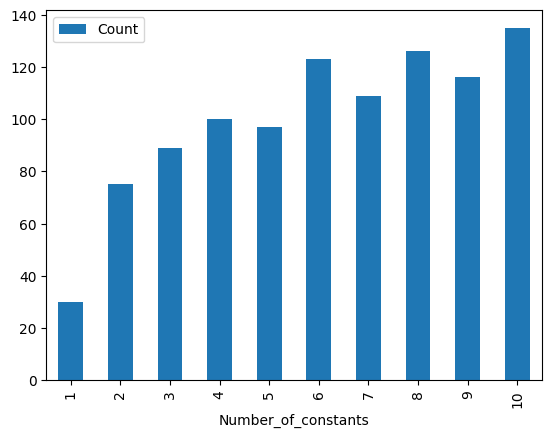

In [10]:
temp = pd.DataFrame(list(zip(constantsCounts.keys(), constantsCounts.values())), columns=['Number_of_constants','Count']).sort_values('Number_of_constants')
temp.plot(kind="bar", x = "Number_of_constants")

In [11]:
# distribution of keys
keys_list = base_dataset['Keys']
keysTemp = []
for keys in keys_list:
    keysTemp.append(keys.count(':'))
keysCounts = collections.Counter(keysTemp)
keysCounts

Counter({12: 112,
         11: 125,
         9: 113,
         8: 116,
         3: 34,
         7: 94,
         10: 122,
         5: 92,
         2: 7,
         13: 33,
         4: 56,
         6: 96})

<Axes: xlabel='Number_of_keys'>

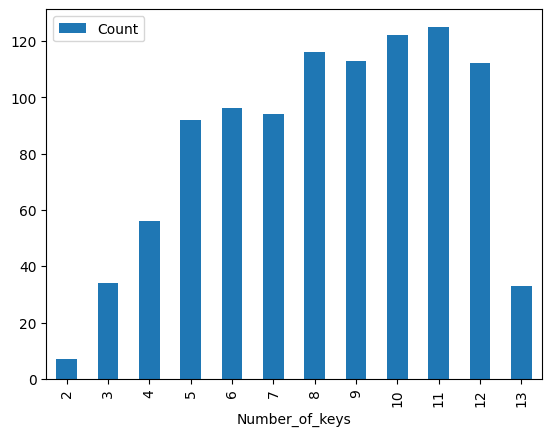

In [12]:
temp = pd.DataFrame(list(zip(keysCounts.keys(), keysCounts.values())), columns=['Number_of_keys','Count']).sort_values('Number_of_keys')
temp.plot(kind="bar", x = "Number_of_keys")

In [13]:
# distribution of world model size
worldModel_list = base_dataset['World Model']
wmTemp = []
for wm in worldModel_list:
    wmTemp.append(wm.count('.'))
worldModelCounts = collections.Counter(wmTemp)
worldModelCounts

Counter({20: 83,
         10: 88,
         14: 72,
         27: 29,
         15: 23,
         2: 34,
         18: 104,
         16: 83,
         24: 30,
         6: 90,
         1: 7,
         30: 33,
         12: 98,
         3: 9,
         4: 60,
         21: 28,
         8: 86,
         7: 9,
         9: 29,
         5: 5})

<Axes: xlabel='Number_of_Sentences'>

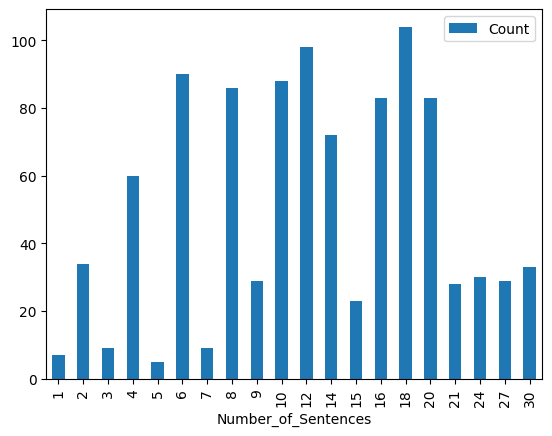

In [14]:
temp = pd.DataFrame(list(zip(worldModelCounts.keys(), worldModelCounts.values())), columns=['Number_of_Sentences','Count']).sort_values('Number_of_Sentences')
temp.plot(kind="bar", x = "Number_of_Sentences")

In [15]:
# generally: count all negations, implications, and-operators individually for each formula (string-find-count).
# from this deduce another list: total number of operators => plot this count. (is more operators harder?)
numNegations = []
numImplications = []
numAnds = []

formula_list = base_dataset['Formula']
for formula in formula_list:
    numNegations.append(formula.count("-"))
    numImplications.append(formula.count(">"))
    numAnds.append(formula.count("&"))

numTotalOperators = [a + b + c for (a, b, c) in zip(numNegations,numImplications,numAnds)]

In [16]:
negationCounts = collections.Counter(numNegations)
negationCounts

Counter({5: 225, 2: 107, 3: 223, 1: 25, 6: 104, 4: 273, 7: 34, 0: 6, 8: 3})

<Axes: xlabel='Number_of_Negations'>

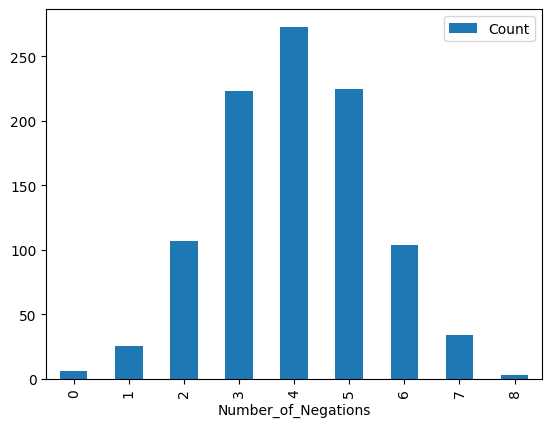

In [17]:
temp = pd.DataFrame(list(zip(negationCounts.keys(), negationCounts.values())), columns=['Number_of_Negations','Count']).sort_values('Number_of_Negations')
temp.plot(kind="bar", x = "Number_of_Negations")

In [18]:
implicationCounts = collections.Counter(numImplications)
implicationCounts

Counter({1: 533, 0: 255, 2: 212})

In [19]:
andCounts = collections.Counter(numAnds)
andCounts

Counter({1: 531, 2: 252, 0: 217})

In [20]:
totalOperatorCounts = collections.Counter(numTotalOperators)
totalOperatorCounts

Counter({7: 224, 4: 109, 5: 220, 3: 27, 8: 104, 6: 273, 9: 34, 2: 6, 10: 3})

<Axes: xlabel='Number_of_Operators'>

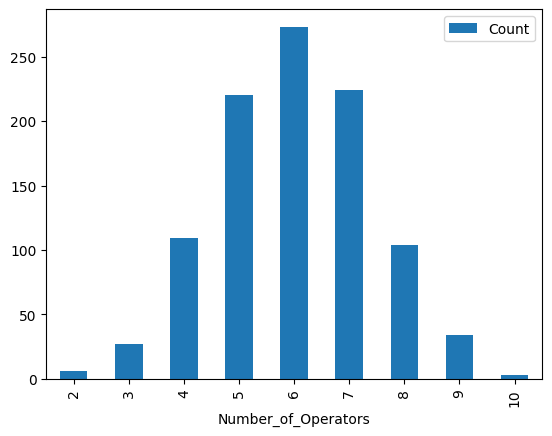

In [21]:
temp = pd.DataFrame(list(zip(totalOperatorCounts.keys(), totalOperatorCounts.values())), columns=['Number_of_Operators','Count']).sort_values('Number_of_Operators')
temp.plot(kind="bar", x = "Number_of_Operators")

In [22]:
# (is a certain type of operator harder (none, unary, binary, unary + binary)?
# none is in totalOperatorCounts 
# noOperators = [True if x == 0 else False for x in totalOperatorCounts]
# <- this is not really needed, see above.

In [23]:
# how many times there is negation in front of quantifiers vs. not (is negation in front of quantifiers harder?)
numNegationInFront = []
for formula in formula_list:
    if formula[0] == "-":
        numNegationInFront.append(True)
    else:
        numNegationInFront.append(False)
negationInFrontCounts = collections.Counter(numNegationInFront)
negationInFrontCounts

Counter({False: 499, True: 501})

In [24]:
# unary is negationCounts > 0 und implicationCounts == 0 und andCounts == 0.
# binary is negationCounts == 0 und implicationCounts > 0 oder andCounts > 0.
# unary + binary == 
unaryOperators = []
binaryOperators = []
unaryBinaryOperators = []
for nega, impl, andop in zip(numNegations, numImplications, numAnds):
    if nega > 0:
        binaryOperators.append(False)
        if impl == 0 and andop == 0:
            unaryOperators.append(True)
            unaryBinaryOperators.append(False)
        else:
            unaryOperators.append(False)
            unaryBinaryOperators.append(True)
    else:
        binaryOperators.append(True)
        unaryBinaryOperators.append(False)
        unaryOperators.append(False)

In [25]:
unaryOperatorsCounts = collections.Counter(unaryOperators)
unaryOperatorsCounts

Counter({False: 1000})

In [26]:
binaryOperatorsCounts = collections.Counter(binaryOperators)
binaryOperatorsCounts

Counter({False: 994, True: 6})

In [27]:
unaryBinaryOperatorsCounts = collections.Counter(unaryBinaryOperators)
unaryBinaryOperatorsCounts

Counter({True: 994, False: 6})

#### Dataset specific statistics

assume, we have two more columns in the output dataset: Correct (True / False), Gibberish (True / False).

But for now, just create bar charts for IncorrectCorrect.


In [28]:
output_dataset.head()

,Predictions,Target-sat,Valuation,Correct,Gibberish
0,all x.-(-F(x) & -G(x))\n\nAnswer:all x.-(F(x) ...,unsatisfied,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",True,False
1,all x.-(-F(x) -> F(x))\n\nAnswer:all x.-(-F(x)...,unsatisfied,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",True,False
2,all x.-(-F(x) & G(x))\n\nAnswer:all x.-(F(x) &...,unsatisfied,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",True,False
3,all x.-(-H(x) & F(x)) is unsatisfied given the...,unsatisfied,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",False,False
4,exists x.-(-H(x) & -F(x))\n\nAnswer:exists x.-...,satisfied,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",True,False


In [29]:
s = pd.Series([i for i in range(0, 1000, 1)])
base_dataset.set_index([s])
base_dataset.head()

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
0,exists y.all x.(-G(x) & -(-F(y) -> -F(y))),"[F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'F': 'Confident', 'G': 'Bothered'}","{'d': 'Catalina', 'g': 'Ulises', 'n': 'Meredit...",F: Confident. G: Bothered. d: Catalina. g: Uli...,"[Catalina, Ulises, Meredith, Diana, Philip, Ka...","[Confident, Bothered]",Catalina is not Confident. Ulises is not Conf...,"[[d, Catalina], [g, Ulises], [n, Meredith], [f...",unsatisfied
1,-all y.exists x.(-F(y) -> -(F(y) & -F(x))),[F],"[y, x]","[>, &, -]","['all', 'exists']",{'F': 'Conservative'},"{'k': 'Lennox', 'b': 'Evie', 'h': 'Leyla', 'i'...",F: Conservative. k: Lennox. b: Evie. h: Leyla....,"[Lennox, Evie, Leyla, Trent, Andrew, Abdiel, J...",[Conservative],Lennox is not Conservative. Evie is Conservat...,"[[k, Lennox], [b, Evie], [h, Leyla], [i, Trent...",unsatisfied
2,all y.exists x.(F(x) & (-F(y) -> G(y))),"[F, G]","[y, x]","[>, &, -]","['all', 'exists']","{'F': 'Bothered', 'G': 'Selfish'}","{'h': 'Paris', 's': 'Franklin', 'k': 'Gia', 'd...",F: Bothered. G: Selfish. h: Paris. s: Franklin...,"[Paris, Franklin, Gia, Saige, Jaziel, Rocky, E...","[Bothered, Selfish]",Paris is Bothered. Franklin is Bothered. Gia ...,"[[h, Paris], [s, Franklin], [k, Gia], [d, Saig...",unsatisfied
3,-all y.exists x.(-G(x) & -(H(x) & F(y))),"[H, F, G]","[y, x]","[&, -]","['all', 'exists']","{'H': 'Conscientious', 'F': 'Arrogant', 'G': '...","{'b': 'Dulce', 'p': 'Arabella', 'd': 'Bruno', ...",H: Conscientious. F: Arrogant. G: Distraught. ...,"[Dulce, Arabella, Bruno, Nathanael, Giana, Adl...","[Conscientious, Arrogant, Distraught]",Dulce is Conscientious. Arabella is Conscient...,"[[b, Dulce], [p, Arabella], [d, Bruno], [q, Na...",unsatisfied
4,-exists y.all x.(-(H(x) -> -F(y)) & -G(x)),"[H, F, G]","[y, x]","[&, ->, -]","['all', 'exists']","{'H': 'Antagonistic', 'F': 'Joyful', 'G': 'Zea...","{'a': 'Tadeo', 'o': 'Braden', 'j': 'Jacqueline...",H: Antagonistic. F: Joyful. G: Zealous. a: Tad...,"[Tadeo, Braden, Jacqueline, Audrey, Emma]","[Antagonistic, Joyful, Zealous]",Tadeo is Antagonistic. Braden is Antagonistic...,"[[a, Tadeo], [o, Braden], [j, Jacqueline], [d,...",satisfied


In [30]:
# - with a certain type of quantifier? (all, exists)
temp_df = pd.concat([output_dataset['Correct'], base_dataset['Quantifiers']], axis=1)
temp_df.head()

,Correct,Quantifiers
0,True,"['all', 'exists']"
1,True,"['all', 'exists']"
2,True,"['all', 'exists']"
3,False,"['all', 'exists']"
4,True,"['all', 'exists']"


In [31]:
quantifierCounts = temp_df.groupby(['Correct', 'Quantifiers']).size()
quantifierCounts

Correct  Quantifiers      
False    ['all', 'exists']     61
True     ['all', 'exists']    939
dtype: int64

In [32]:
keyCounts_df = pd.DataFrame()
keyCounts_df["keyCounts"] = pd.DataFrame(keysTemp)
keyCounts_df = keyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
keyCounts_df["Correct"] = output_dataset['Correct']
keyCounts_df

,keyCounts,Correct
0,12,True
1,11,True
2,9,True
3,12,False
4,8,True
...,...,...
995,13,True
996,8,True
997,4,True
998,13,True


In [33]:
keyCounts = keyCounts_df.groupby(['Correct', 'keyCounts']).size()
keyCounts

Correct  keyCounts
False    3              5
         4              4
         5              6
         6              5
         7              3
         8              3
         9              9
         10             6
         11             9
         12            10
         13             1
True     2              7
         3             29
         4             52
         5             86
         6             91
         7             91
         8            113
         9            104
         10           116
         11           116
         12           102
         13            32
dtype: int64

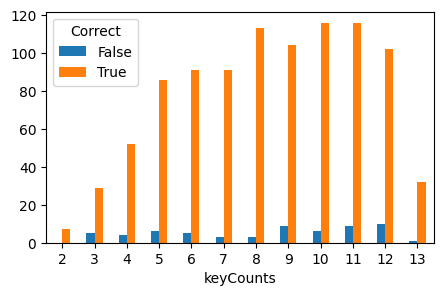

In [34]:
dfp = keyCounts_df.pivot_table(index='keyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()


In [35]:
# - with a certain number of constants?
constantsCounts_df = pd.DataFrame()
constantsCounts_df["constantCounts"] = pd.DataFrame(constants)
constantsCounts_df = constantsCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
constantsCounts_df["Correct"] = output_dataset['Correct']
constantsCounts_df

,constantCounts,Correct
0,10,True
1,10,True
2,7,True
3,9,False
4,5,True
...,...,...
995,10,True
996,5,True
997,2,True
998,10,True


In [36]:
constantCounts = constantsCounts_df.groupby(['Correct', 'constantCounts']).size()
constantCounts

Correct  constantCounts
False    1                   6
         2                   6
         3                   4
         4                   6
         5                   2
         6                   4
         7                   9
         8                   7
         9                   6
         10                 11
True     1                  24
         2                  69
         3                  85
         4                  94
         5                  95
         6                 119
         7                 100
         8                 119
         9                 110
         10                124
dtype: int64

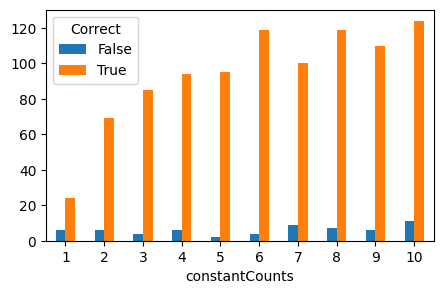

In [37]:
dfp = constantsCounts_df.pivot_table(index='constantCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [38]:
# - with a certain number of predicates?

In [39]:
oldpredicates = base_dataset['Predicates']
predicates = []
for pred in oldpredicates:
    predicates.append(len(pred))

predicatesCounts_df = pd.DataFrame()
predicatesCounts_df["predicatesCounts"] = pd.DataFrame(predicates)
predicatesCounts_df = predicatesCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
predicatesCounts_df["Correct"] = output_dataset['Correct']
predicatesCounts_df

predicatesCounts = predicatesCounts_df.groupby(['Correct', 'predicatesCounts']).size()
predicatesCounts

Correct  predicatesCounts
False    1                     1
         2                    43
         3                    17
True     1                   107
         2                   629
         3                   203
dtype: int64

In [40]:
43/629

0.06836248012718601

In [41]:
17/203

0.08374384236453201

FIRST LEARNING: MORE PREDICATES IS HARDER!! 

In [42]:
# - with a certain size of the world model?
wmCounts_df = pd.DataFrame()
wmCounts_df["WorldModelCounts"] = pd.DataFrame(wmTemp)
wmCounts_df = wmCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
wmCounts_df["Correct"] = output_dataset['Correct']
wmCounts_df

,WorldModelCounts,Correct
0,20,True
1,10,True
2,14,True
3,27,False
4,15,True
...,...,...
995,30,True
996,15,True
997,4,True
998,30,True


In [43]:
wmCounts = wmCounts_df.groupby(['Correct', 'WorldModelCounts']).size()
wmCounts

Correct  WorldModelCounts
False    2                    5
         3                    1
         4                    3
         6                    6
         8                    4
         9                    1
         10                   2
         12                   4
         14                   7
         15                   1
         16                   4
         18                   7
         20                   9
         21                   2
         24                   3
         27                   1
         30                   1
True     1                    7
         2                   29
         3                    8
         4                   57
         5                    5
         6                   84
         7                    9
         8                   82
         9                   28
         10                  86
         12                  94
         14                  65
         15                  22
         16   

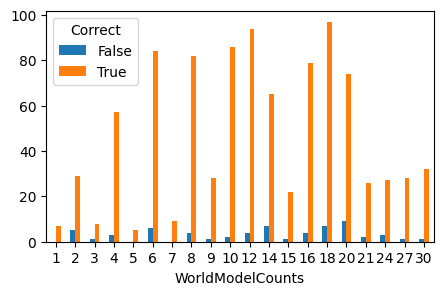

In [44]:
dfp = wmCounts_df.pivot_table(index='WorldModelCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

World model size does not seem to make a difference! -> but plot a regression or something.

In [45]:
# - with a certain number of operators? 
operatorCounts_df = pd.DataFrame()
operatorCounts_df["operatorCounts"] = pd.DataFrame(numTotalOperators)
operatorCounts_df = operatorCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
operatorCounts_df["Correct"] = output_dataset['Correct']
operatorCounts_df

,operatorCounts,Correct
0,7,True
1,7,True
2,4,True
3,5,False
4,7,True
...,...,...
995,7,True
996,7,True
997,5,True
998,5,True


In [46]:
operatorCounts = operatorCounts_df.groupby(['Correct', 'operatorCounts']).size()
operatorCounts

Correct  operatorCounts
False    4                   7
         5                  15
         6                  19
         7                  13
         8                   6
         9                   1
True     2                   6
         3                  27
         4                 102
         5                 205
         6                 254
         7                 211
         8                  98
         9                  33
         10                  3
dtype: int64

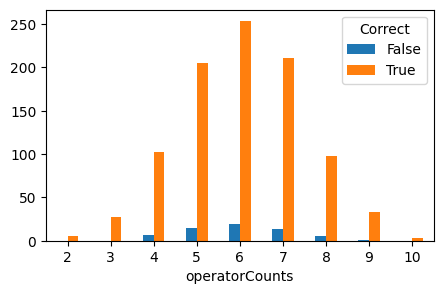

In [47]:
dfp = operatorCounts_df.pivot_table(index='operatorCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [48]:
# - with a certain type of operator? (negation, implication, and-operator) 
# negation
negationCounts_df = pd.DataFrame()
negationCounts_df["negationCounts"] = pd.DataFrame(numNegations)
negationCounts_df = negationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
negationCounts_df["Correct"] = output_dataset['Correct']
negationCounts_df

,negationCounts,Correct
0,5,True
1,5,True
2,2,True
3,3,False
4,5,True
...,...,...
995,5,True
996,5,True
997,3,True
998,3,True


In [49]:
negationCounts = negationCounts_df.groupby(['Correct', 'negationCounts']).size()
negationCounts

Correct  negationCounts
False    2                   6
         3                  16
         4                  19
         5                  13
         6                   6
         7                   1
True     0                   6
         1                  25
         2                 101
         3                 207
         4                 254
         5                 212
         6                  98
         7                  33
         8                   3
dtype: int64

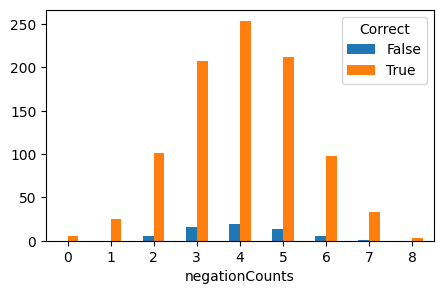

In [50]:
dfp = negationCounts_df.pivot_table(index='negationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [51]:
# implication
implicationCounts_df = pd.DataFrame()
implicationCounts_df["implicationCounts"] = pd.DataFrame(numImplications)
implicationCounts_df = implicationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
implicationCounts_df["Correct"] = output_dataset['Correct']
implicationCounts_df

,implicationCounts,Correct
0,1,True
1,1,True
2,1,True
3,0,False
4,1,True
...,...,...
995,2,True
996,0,True
997,2,True
998,2,True


In [52]:
implicationCounts = implicationCounts_df.groupby(['Correct', 'implicationCounts']).size()
implicationCounts

Correct  implicationCounts
False    0                     15
         1                     32
         2                     14
True     0                    240
         1                    501
         2                    198
dtype: int64

In [53]:
184/348

0.5287356321839081

In [54]:
141/327

0.43119266055045874

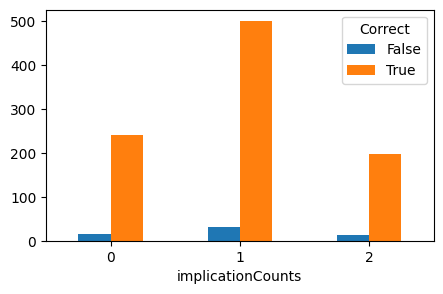

In [55]:
dfp = implicationCounts_df.pivot_table(index='implicationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [56]:
# and-operator
andOpCounts_df = pd.DataFrame()
andOpCounts_df["andOpCounts"] = pd.DataFrame(numAnds)
andOpCounts_df = andOpCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
andOpCounts_df["Correct"] = output_dataset['Correct']
andOpCounts_df

,andOpCounts,Correct
0,1,True
1,1,True
2,1,True
3,2,False
4,1,True
...,...,...
995,0,True
996,2,True
997,0,True
998,0,True


In [57]:
andOpCounts = andOpCounts_df.groupby(['Correct', 'andOpCounts']).size()
andOpCounts

Correct  andOpCounts
False    0               15
         1               31
         2               15
True     0              202
         1              500
         2              237
dtype: int64

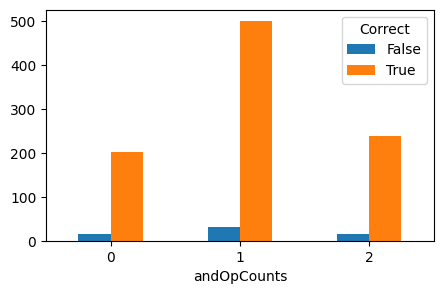

In [58]:
dfp = andOpCounts_df.pivot_table(index='andOpCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [59]:
def get_frequencies(output_dataset, count_list, column_name):
    temp_df = pd.DataFrame()
    temp_df[column_name] = pd.DataFrame(count_list)
    temp_df = temp_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
    temp_df["Correct"] = output_dataset['Correct']
    return temp_df.groupby(['Correct', column_name]).size()

In [60]:
# -> especially: is there negation in front of quantifiers or not? 
get_frequencies(output_dataset, numNegationInFront, "NegationInFront")


Correct  NegationInFront
False    False               29
         True                32
True     False              470
         True               469
dtype: int64

In [61]:
#  using only no operators vs. unary vs. binary operators // 
get_frequencies(output_dataset, unaryOperators, "UnaryOperator")

Correct  UnaryOperator
False    False             61
True     False            939
dtype: int64

In [62]:
get_frequencies(output_dataset, binaryOperators, "BinaryOperator")


Correct  BinaryOperator
False    False              61
True     False             933
         True                6
dtype: int64

In [63]:
get_frequencies(output_dataset, unaryBinaryOperators, "UnaryAndBinaryOperators")


Correct  UnaryAndBinaryOperators
False    True                        61
True     False                        6
         True                       933
dtype: int64

We need to look here at the relative frequencies: it tends to be about 5% ratio or 10% ratio. So quite balanced. i.e. no set of operators leads to a worse outcome. => Qualitative analysis necessary!

### Tautologies / Contradictions

In [64]:
import nltk
from nltk.inference.prover9 import BaseProverCommand, Prover, Prover9Command
from nltk.sem import Expression
from nltk.sem.logic import (
    AllExpression,
    AndExpression,
    EqualityExpression,
    ExistsExpression,
    Expression,
    IffExpression,
    ImpExpression,
    NegatedExpression,
    OrExpression,
)
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic

In [65]:
from timeout import timeout

In [66]:
# a formula without assumptions is generally false (instead of undefined) for ResolutionProver.
# Tested the functions below so that tautologies are recognised, contradictions as well, but not other formulas (which are neither contradictions or tautologies).

In [67]:
@timeout(2)
def is_tautology(expression):
    # needs to be true, regardless of the input.
    # needs to be false when negated, regardless of the input.
    if ResolutionProver().prove(expression, [], verbose=True) and not ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [68]:
@timeout(2)
def is_contradiction(expression):
    # needs to be false, regardless of the input.
    # needs to be true when negated, regardless of the input.
    if not ResolutionProver().prove(expression, [], verbose=True) and ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [69]:
read_expr = Expression.fromstring

In [70]:
formula = read_expr(base_dataset["Formula"].iloc[59])
formula = NegatedExpression(formula) # negating a contradiction makes it a tautology.
formula

<NegatedExpression --all y.exists x.-(-G(x) & -(H(y) -> -F(x)))>

In [71]:
res = ResolutionProver().prove(formula, [], verbose=True)

[1] {-G(z3)}  A 
[2] {H(z4)}   A 
[3] {F(z5)}   A 



Descriptive Statistics regarding tautologies

In [78]:
numTautologies = []
timedout = []
for i in range(len(base_dataset)):
    #if i in [18, 19]:
    #    continue
    try:
        formula = base_dataset['Formula'].iloc[i]
        numTautologies.append(is_tautology(read_expr(formula)))
        timedout.append(False)
    except:
        numTautologies.append(False)
        timedout.append(True)

[1] {G(F25524(z25526)), F(z25526), -F(z25526)}  A Tautology

[1] {F(z25529), -F(z25529), F(F25527(z25529))}  A Tautology

[1] {-F(z25532), -F(z25533)}  A 
[2] {-F(z25534), -G(z25535)}  A 

[1] {-G(F25536(z25538))}              A 
[2] {-H(F25536(z25539)), -F(z25539)}  A 

[1] {H(z25542)}   A 
[2] {F(z25543)}   A 
[3] {-G(z25544)}  A 

[1] {-H(z25547), H(F25545(z25547)), -F(F25545(z25547))}  A 

[1] {F(z25550)}          A 
[2] {H(F25548(z25551))}  A 
[3] {H(F25548(z25552))}  A 

[1] {-F(z25555), G(z25555)}  A 
[2] {-H(F25553(z25556))}     A 

[1] {F(z25560), H(z25559), -H(z25560)}  A 

[1] {F(z25563), -F(z25563)}  A Tautology
[2] {-H(z25564)}             A 

[1] {-H(F25565(z25567)), H(z25567)}  A 
[2] {G(F25565(z25568))}              A 

[1] {F(F25569(z25571)), G(z25571), -F(F25569(z25571))}  A Tautology

[1] {G(z25574)}   A 
[2] {F(z25575)}   A 
[3] {-F(z25576)}  A 
[4] {}            (2, 3) 

[1] {-G(F25577(z25579)), -F(F25577(z25579)), F(z25579)}  A 

[1] {-F(F25580(z25582))}  A 
[2] {

In [79]:
numContradictions = []
timedout2 = []
for i in range(len(base_dataset)):
    #if i in [18, 19]:
    #    continue
    try:
        formula = base_dataset['Formula'].iloc[i]
        numContradictions.append(is_contradiction(read_expr(formula)))
        timedout2.append(False)
    except:
        numContradictions.append(False)
        timedout2.append(True)

[1] {G(F30293(z30295)), F(z30295), -F(z30295)}  A Tautology

[1] {-G(z30298)}  A 
[2] {-F(z30299)}  A 
[3] {F(z30300)}   A 
[4] {}            (2, 3) 

[1] {F(z30303), -F(z30303), F(F30301(z30303))}  A Tautology

[1] {-F(z30306)}  A 
[2] {F(z30307)}   A 
[3] {-F(z30308)}  A 
[4] {}            (1, 2) 

[1] {-F(z30311), -F(z30312)}  A 
[2] {-F(z30313), -G(z30314)}  A 

[1] {F(F30315(z30317))}     A 
[2] {F(z30318), G(z30318)}  A 

[1] {-G(F30319(z30321))}              A 
[2] {-H(F30319(z30322)), -F(z30322)}  A 

[1] {G(z30325), H(z30325)}  A 
[2] {G(z30327), F(z30326)}  A 

[1] {H(z30330)}   A 
[2] {F(z30331)}   A 
[3] {-G(z30332)}  A 

[1] {-H(F30333(z30335)), -F(z30335), G(F30333(z30335))}  A 

[1] {-H(z30338), H(F30336(z30338)), -F(F30336(z30338))}  A 

[1] {H(z30341)}   A 
[2] {-H(z30342)}  A 
[3] {F(z30343)}   A 
[4] {}            (1, 2) 

[1] {F(z30346)}          A 
[2] {H(F30344(z30347))}  A 
[3] {H(F30344(z30348))}  A 

[1] {-F(z30351), -H(z30352), -H(z30352)}  A 

[1] {-F(z30355)

In [80]:
timedout3 = [i and j for i,j in zip(timedout, timedout2)]

In [81]:
sum(timedout3)

38

In [82]:
tautologyCounts_df = pd.DataFrame()
tautologyCounts_df["tautologyCounts"] = pd.DataFrame(numTautologies)
tautologyCounts_df = tautologyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
tautologyCounts_df["Correct"] = output_dataset['Correct']
tautologyCounts_df

,tautologyCounts,Correct
0,False,True
1,False,True
2,False,True
3,False,False
4,False,True
...,...,...
995,False,True
996,False,True
997,True,True
998,False,True


In [83]:
tautologyCounts = tautologyCounts_df.groupby(['Correct', 'tautologyCounts']).size()
tautologyCounts

Correct  tautologyCounts
False    False               59
         True                 2
True     False              830
         True               109
dtype: int64

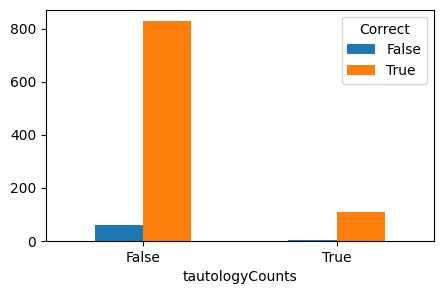

In [84]:
dfp = tautologyCounts_df.pivot_table(index='tautologyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [74]:
17/142

0.11971830985915492

In [75]:
106/735

0.14421768707482993

In [85]:
contradictionCounts_df = pd.DataFrame()
contradictionCounts_df["contradictionCounts"] = pd.DataFrame(numContradictions)
contradictionCounts_df = contradictionCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
contradictionCounts_df["Correct"] = output_dataset['Correct']
contradictionCounts_df

,contradictionCounts,Correct
0,True,True
1,True,True
2,False,True
3,False,False
4,False,True
...,...,...
995,False,True
996,False,True
997,False,True
998,False,True


In [86]:
contradictionCounts = contradictionCounts_df.groupby(['Correct', 'contradictionCounts']).size()
contradictionCounts

Correct  contradictionCounts
False    False                   52
         True                     9
True     False                  848
         True                    91
dtype: int64

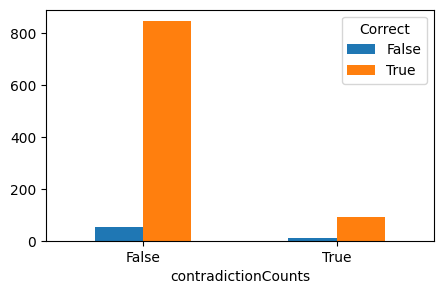

In [87]:
dfp = contradictionCounts_df.pivot_table(index='contradictionCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()